1. Neural Networks

In [58]:
#Importing Data for NeuraL Networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

train_dir = 'C:/Users/Developer/Downloads/Compressed/dumpware10_images/dumpware10_images/SQUAREROOT/300/TRAIN'
test_dir = 'C:/Users/Developer/Downloads/Compressed/dumpware10_images/dumpware10_images/SQUAREROOT/300/TEST'

# Rescale pixel values from [0, 255] to [0, 1] for neural network model
#improvements :using augmentation techniques like rotation, flipping, and zooming to increase the diversity of your training data
train_datagen = ImageDataGenerator(rescale
                                   =1./255, rotation_range=20, width_shift_range=0.2,
                                       height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),  # Resize images
    batch_size=20,
    class_mode='binary'  # or 'categorical' for multiclass classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=20,
    class_mode='binary'
)
def load_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                image_path = os.path.join(label_path, filename)
                image = cv2.imread(image_path)
                if image is not None:
                    images.append(image)
                    labels.append(label)
    return images, labels


Found 3433 images belonging to 11 classes.
Found 861 images belonging to 11 classes.


In [59]:
import numpy as np
import cv2
X_train, y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)

# Convert image lists to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Normalize pixel values for ML models
X_train = X_train / 255.0
X_test = X_test / 255.0
# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize the pixel values to [0, 1]
X_train_flat = X_train_flat.astype('float32') / 255.0
X_test_flat = X_test_flat.astype('float32') / 255.0


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Assuming X_train_flat is your input features
input_shape = X_train_flat.shape[1]  # Number of features

model = Sequential([
    Dense(512, activation='relu', input_shape=(input_shape,)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')  # Adjusted to match the number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [61]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Ensure y_train and y_test are loaded and defined here
# If not, you'll need to load or define them as per your dataset

label_encoder = LabelEncoder()
y_train_indices = label_encoder.fit_transform(y_train)
y_test_indices = label_encoder.transform(y_test)

# Now, you can proceed with one-hot encoding
num_classes = len(label_encoder.classes_)  # Determine the number of unique classes
y_train_cat = to_categorical(y_train_indices, num_classes=num_classes)
y_test_cat = to_categorical(y_test_indices, num_classes=num_classes)


In [62]:
X_train_flat = X_train_flat.astype('float32')
X_test_flat = X_test_flat.astype('float32')


Epoch 1/20
22/22 [==============================] - 63s 2s/step - loss: 2.0008 - accuracy: 0.3197 - val_loss: 3.9787 - val_accuracy: 0.0000e+00
Epoch 2/20
22/22 [==============================] - 29s 1s/step - loss: 1.1780 - accuracy: 0.6482 - val_loss: 4.4083 - val_accuracy: 0.0000e+00
Epoch 3/20
22/22 [==============================] - 28s 1s/step - loss: 0.7229 - accuracy: 0.7822 - val_loss: 5.3349 - val_accuracy: 0.0000e+00
Epoch 4/20
22/22 [==============================] - 28s 1s/step - loss: 0.5369 - accuracy: 0.8423 - val_loss: 6.0834 - val_accuracy: 0.0000e+00
Epoch 5/20
22/22 [==============================] - 29s 1s/step - loss: 0.3955 - accuracy: 0.8857 - val_loss: 5.8008 - val_accuracy: 0.0771
Epoch 6/20
22/22 [==============================] - 29s 1s/step - loss: 0.3054 - accuracy: 0.9173 - val_loss: 5.8669 - val_accuracy: 0.5255
Epoch 7/20
22/22 [==============================] - 28s 1s/step - loss: 0.2387 - accuracy: 0.9330 - val_loss: 5.3144 - val_accuracy: 0.5357
Epoc

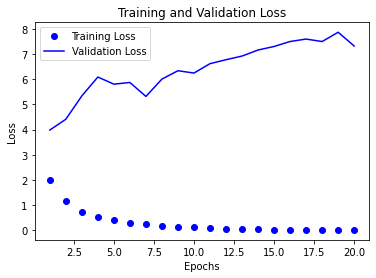

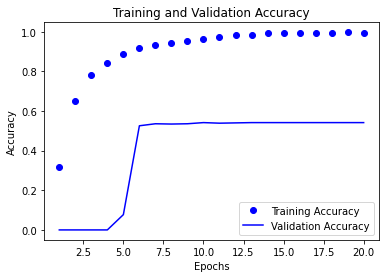

In [63]:
import matplotlib.pyplot as plt
# Train the model and log the training process
history = model.fit(X_train_flat, y_train_cat,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)  #Improvement: Set verbose to 1 for progress bar during training

# Access training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# We can visualize this data using libraries like Matplotlib or Plotly
# improvement: This will plot training and validation loss/accuracy over epochs

epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [64]:
# Make predictions on the test data
predictions = model.predict(X_test_flat)

# Get the predicted classes by taking the index of the highest probability
predicted_classes = np.argmax(predictions, axis=1)

# predicted_classes now contains the predicted class labels for each sample in X_test_flat

27/27 [==============================] - 6s 183ms/step


In [65]:
y_test_integers = np.argmax(y_test_cat, axis=1)


Accuracy: 0.8630


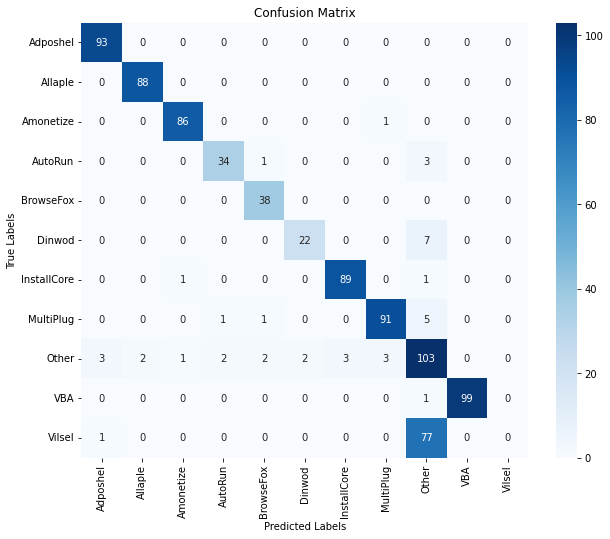

Classification Report:
              precision    recall  f1-score   support

    Adposhel       0.96      1.00      0.98        93
     Allaple       0.98      1.00      0.99        88
   Amonetize       0.98      0.99      0.98        87
     AutoRun       0.92      0.89      0.91        38
   BrowseFox       0.90      1.00      0.95        38
      Dinwod       0.92      0.76      0.83        29
 InstallCore       0.97      0.98      0.97        91
   MultiPlug       0.96      0.93      0.94        98
       Other       0.52      0.85      0.65       121
         VBA       1.00      0.99      0.99       100
      Vilsel       0.00      0.00      0.00        78

    accuracy                           0.86       861
   macro avg       0.83      0.85      0.84       861
weighted avg       0.81      0.86      0.83       861



C:\Users\Developer\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Developer\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Developer\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test_integers, predicted_classes)
print(f"Accuracy: {accuracy:.4f}")
#improvement visualization
# Compute confusion matrix
cm = confusion_matrix(y_test_integers, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test_integers, predicted_classes, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)




In [67]:
# Precision, Recall, and F1 Score
precision = precision_score(y_test_integers, predicted_classes, average='macro')
recall = recall_score(y_test_integers, predicted_classes, average='macro')
f1 = f1_score(y_test_integers, predicted_classes, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Precision: 0.8275
Recall: 0.8536
F1 Score: 0.8360


C:\Users\Developer\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
# Classification Report
print(classification_report(y_test_integers, predicted_classes))



              precision    recall  f1-score   support

           0       0.96      1.00      0.98        93
           1       0.98      1.00      0.99        88
           2       0.98      0.99      0.98        87
           3       0.92      0.89      0.91        38
           4       0.90      1.00      0.95        38
           5       0.92      0.76      0.83        29
           6       0.97      0.98      0.97        91
           7       0.96      0.93      0.94        98
           8       0.52      0.85      0.65       121
           9       1.00      0.99      0.99       100
          10       0.00      0.00      0.00        78

    accuracy                           0.86       861
   macro avg       0.83      0.85      0.84       861
weighted avg       0.81      0.86      0.83       861



C:\Users\Developer\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Developer\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Developer\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

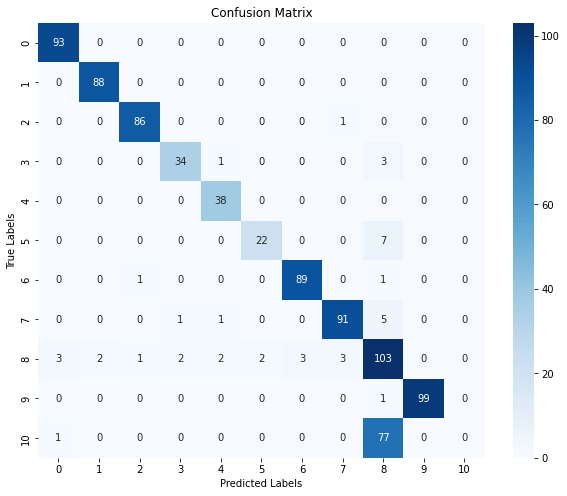

In [69]:
# Confusion Matrix
cm = confusion_matrix(y_test_integers, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


2. Traditional Machine learning Models

In [70]:
from PIL import Image
import numpy as np
import os
#improvements: how we handle the if conditions and also added shaffling the data.
def load_images(directory):
    images = []
    labels = []
    for label_dir in os.listdir(directory):
        label_path = os.path.join(directory, label_dir)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                try:
                    with Image.open(image_path).convert('L') as image:  # Convert to grayscale
                        image = image.resize((32, 32))  # Resize image
                        image_arr = np.array(image).flatten()  # Flatten image
                        images.append(image_arr)
                        labels.append(label_dir)  # Assuming directory names are class names
                except Exception as e:
                    print(f"Error loading image: {e}")
    # Convert lists to numpy arrays
    return np.array(images), np.array(labels)

X_train, y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)

# Shuffle the data
shuffle_index = np.random.permutation(len(X_train))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]



In [71]:
# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize the pixel values to [0, 1]
X_train_flat = X_train_flat.astype('float32') / 255.0
X_test_flat = X_test_flat.astype('float32') / 255.0


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_flat, y_train)

# Predict on the test set
y_pred = rf.predict(X_test_flat)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 95.93%


In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9573
Recall: 0.9381
F1 Score: 0.9460


In [74]:
unique_labels = np.unique(y_train)
print(f"Unique labels in the dataset: {unique_labels}")
if len(unique_labels) == 2:
    print("You are performing binary classification.")
else:
    print("This is not a binary classification task.")


Unique labels in the dataset: ['Adposhel' 'Allaple' 'Amonetize' 'AutoRun' 'BrowseFox' 'Dinwod'
 'InstallCore' 'MultiPlug' 'Other' 'VBA' 'Vilsel']
This is not a binary classification task.


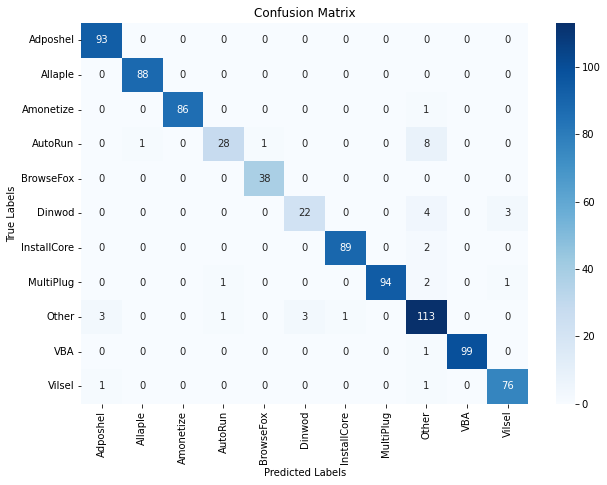

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#improvements:automate the label assignment process based on the unique labels present in your data rather than hardcoding them
# Get unique labels
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


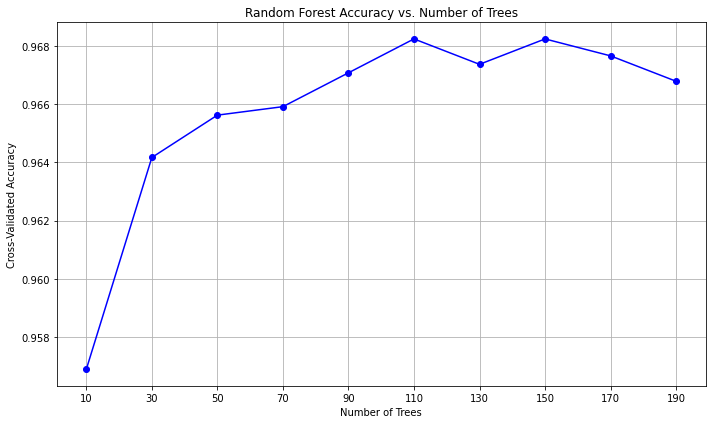

In [76]:
#Visualizing Performance vs. Number of Trees

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
#improvement:adding more labels and annotations to make the plot more descriptive.
# Range of `n_estimators` values to explore
n_estimators_range = np.arange(10, 201, 20)
cross_val_scores_mean = []

# Calculate cross-validated accuracy for each number of trees
for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf, X_train_flat, y_train, cv=5, scoring='accuracy')
    cross_val_scores_mean.append(np.mean(scores))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cross_val_scores_mean, marker='o', linestyle='-', color='b')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(n_estimators_range)  # Show all values on x-axis
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()